In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import dgl
import torch
from torch._C import device
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from dgl.data import MiniGCDataset
from dgl.nn.pytorch import GraphConv
from sklearn.metrics import accuracy_score
import networkx as nx
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 指定路径
path_AM = r'path_to_your_project'

# 遍历文件夹
for idx_1, (root, dirs, files) in enumerate(os.walk(path_AM)):
    # print(idx_1,root,dirs,files)
    # print(idx_1, root.split('\\')[-1])
    for idx_2, file in enumerate(files):
        # print("idx:{:4d}".format(idx_2), "    file:", file)
        
        if file.endswith('.txt'):
            file_path = os.path.join(root, file)
            # print("file_path:", file_path)
            
            if root.split('\\')[-1] == 'label0' and file == '1_AdjacencyMatrix.txt':
                Original = []
                Target = []
                label = root.split('\\')[-1][-1]
                Nodes = []
                Edges_Number = 0
                Edges_Weight = []
                # print(file_path)
                # 读取文件并分割每一行，然后转换成浮点数
                adjacency_matrix = np.loadtxt(file_path, delimiter=' ')

                # 打印读取的邻接矩阵
                print("AdjacencyMatrix.shape:\n", adjacency_matrix.shape, '\n') 
                print("AdjacencyMatrix:\n", adjacency_matrix, '\n') 
                
                for i in range(adjacency_matrix.shape[0]):
                    Nodes.append(i)
                    for j in range(adjacency_matrix.shape[1]):    
                        if adjacency_matrix[i][j] != 0 and i != j:
                            Edges_Number += 1
                            Edges_Weight.append(adjacency_matrix[i][j])
                            Original.append(i)
                            Target.append(j)
                        
print("Label:\n", torch.tensor(int(label)), '\n')
print("Original:\n", torch.tensor(Original), '\n')
print("Target:\n", torch.tensor(Target), '\n')
print("Nodes:\n", torch.tensor(Nodes), '\n')
print("Edges_Number:\n", Edges_Number, '\n')
print("Edges_Weight:\n", torch.tensor(Edges_Weight))

AdjacencyMatrix.shape:
 (51, 51) 

AdjacencyMatrix:
 [[0.04347826 0.86956522 0.         ... 0.         0.         0.        ]
 [0.86956522 0.04347826 0.69565217 ... 0.         0.         0.        ]
 [0.         0.69565217 0.04347826 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04347826 0.7826087  0.        ]
 [0.         0.         0.         ... 0.7826087  0.04347826 0.82608696]
 [0.         0.         0.         ... 0.         0.82608696 0.04347826]] 

Label:
 tensor(0) 

Original:
 tensor([ 0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,
         4,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  8,  9,  9,  9,  9, 10, 10,
        10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
        14, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18,
        18, 18, 19, 19, 19, 20, 20, 20, 20, 21, 21, 22, 22, 22, 22, 22, 23, 23,
        24, 24, 24, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30

In [3]:
# 使用dgl.graph创建图，传入边的列表
graph = dgl.graph((Original, Target))

# 为节点特征赋值
# 指定路径
path_Features = r'path_to_your_project'
# 遍历文件夹
for idx_1, (root, dirs, files) in enumerate(os.walk(path_Features)):
    for idx_2, file in enumerate(files):
        if file.endswith('.txt'):
            file_path = os.path.join(root, file)
            
            if root.split('\\')[-1] == 'label0' and file == '1_encoded.txt':
                Nodes_Features = np.loadtxt(file_path, delimiter=' ')
                print("Nodes_Features.shape:\n", Nodes_Features.shape, '\n')
                print("Nodes_Features:\n", Nodes_Features, '\n')
                
# 为边特征赋值
graph.ndata['feat'] = torch.tensor(Nodes_Features)

# 为边特征赋值
graph.edata['feat'] = torch.tensor(Edges_Weight).reshape((Edges_Number, 1))

# 打印图信息
print(graph)

Nodes_Features.shape:
 (51, 25) 

Nodes_Features:
 [[ 0.    0.    0.   ...  4.    7.   -0.85]
 [ 0.    0.    0.   ...  4.    8.18 -0.78]
 [ 0.    0.    0.   ...  2.    7.    0.48]
 ...
 [ 0.    0.    0.   ...  4.    7.   -0.18]
 [ 0.    0.    0.   ...  2.    7.    0.12]
 [ 0.    0.    0.   ...  2.    7.    0.12]] 

Graph(num_nodes=51, num_edges=188,
      ndata_schemes={'feat': Scheme(shape=(25,), dtype=torch.float64)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float64)})


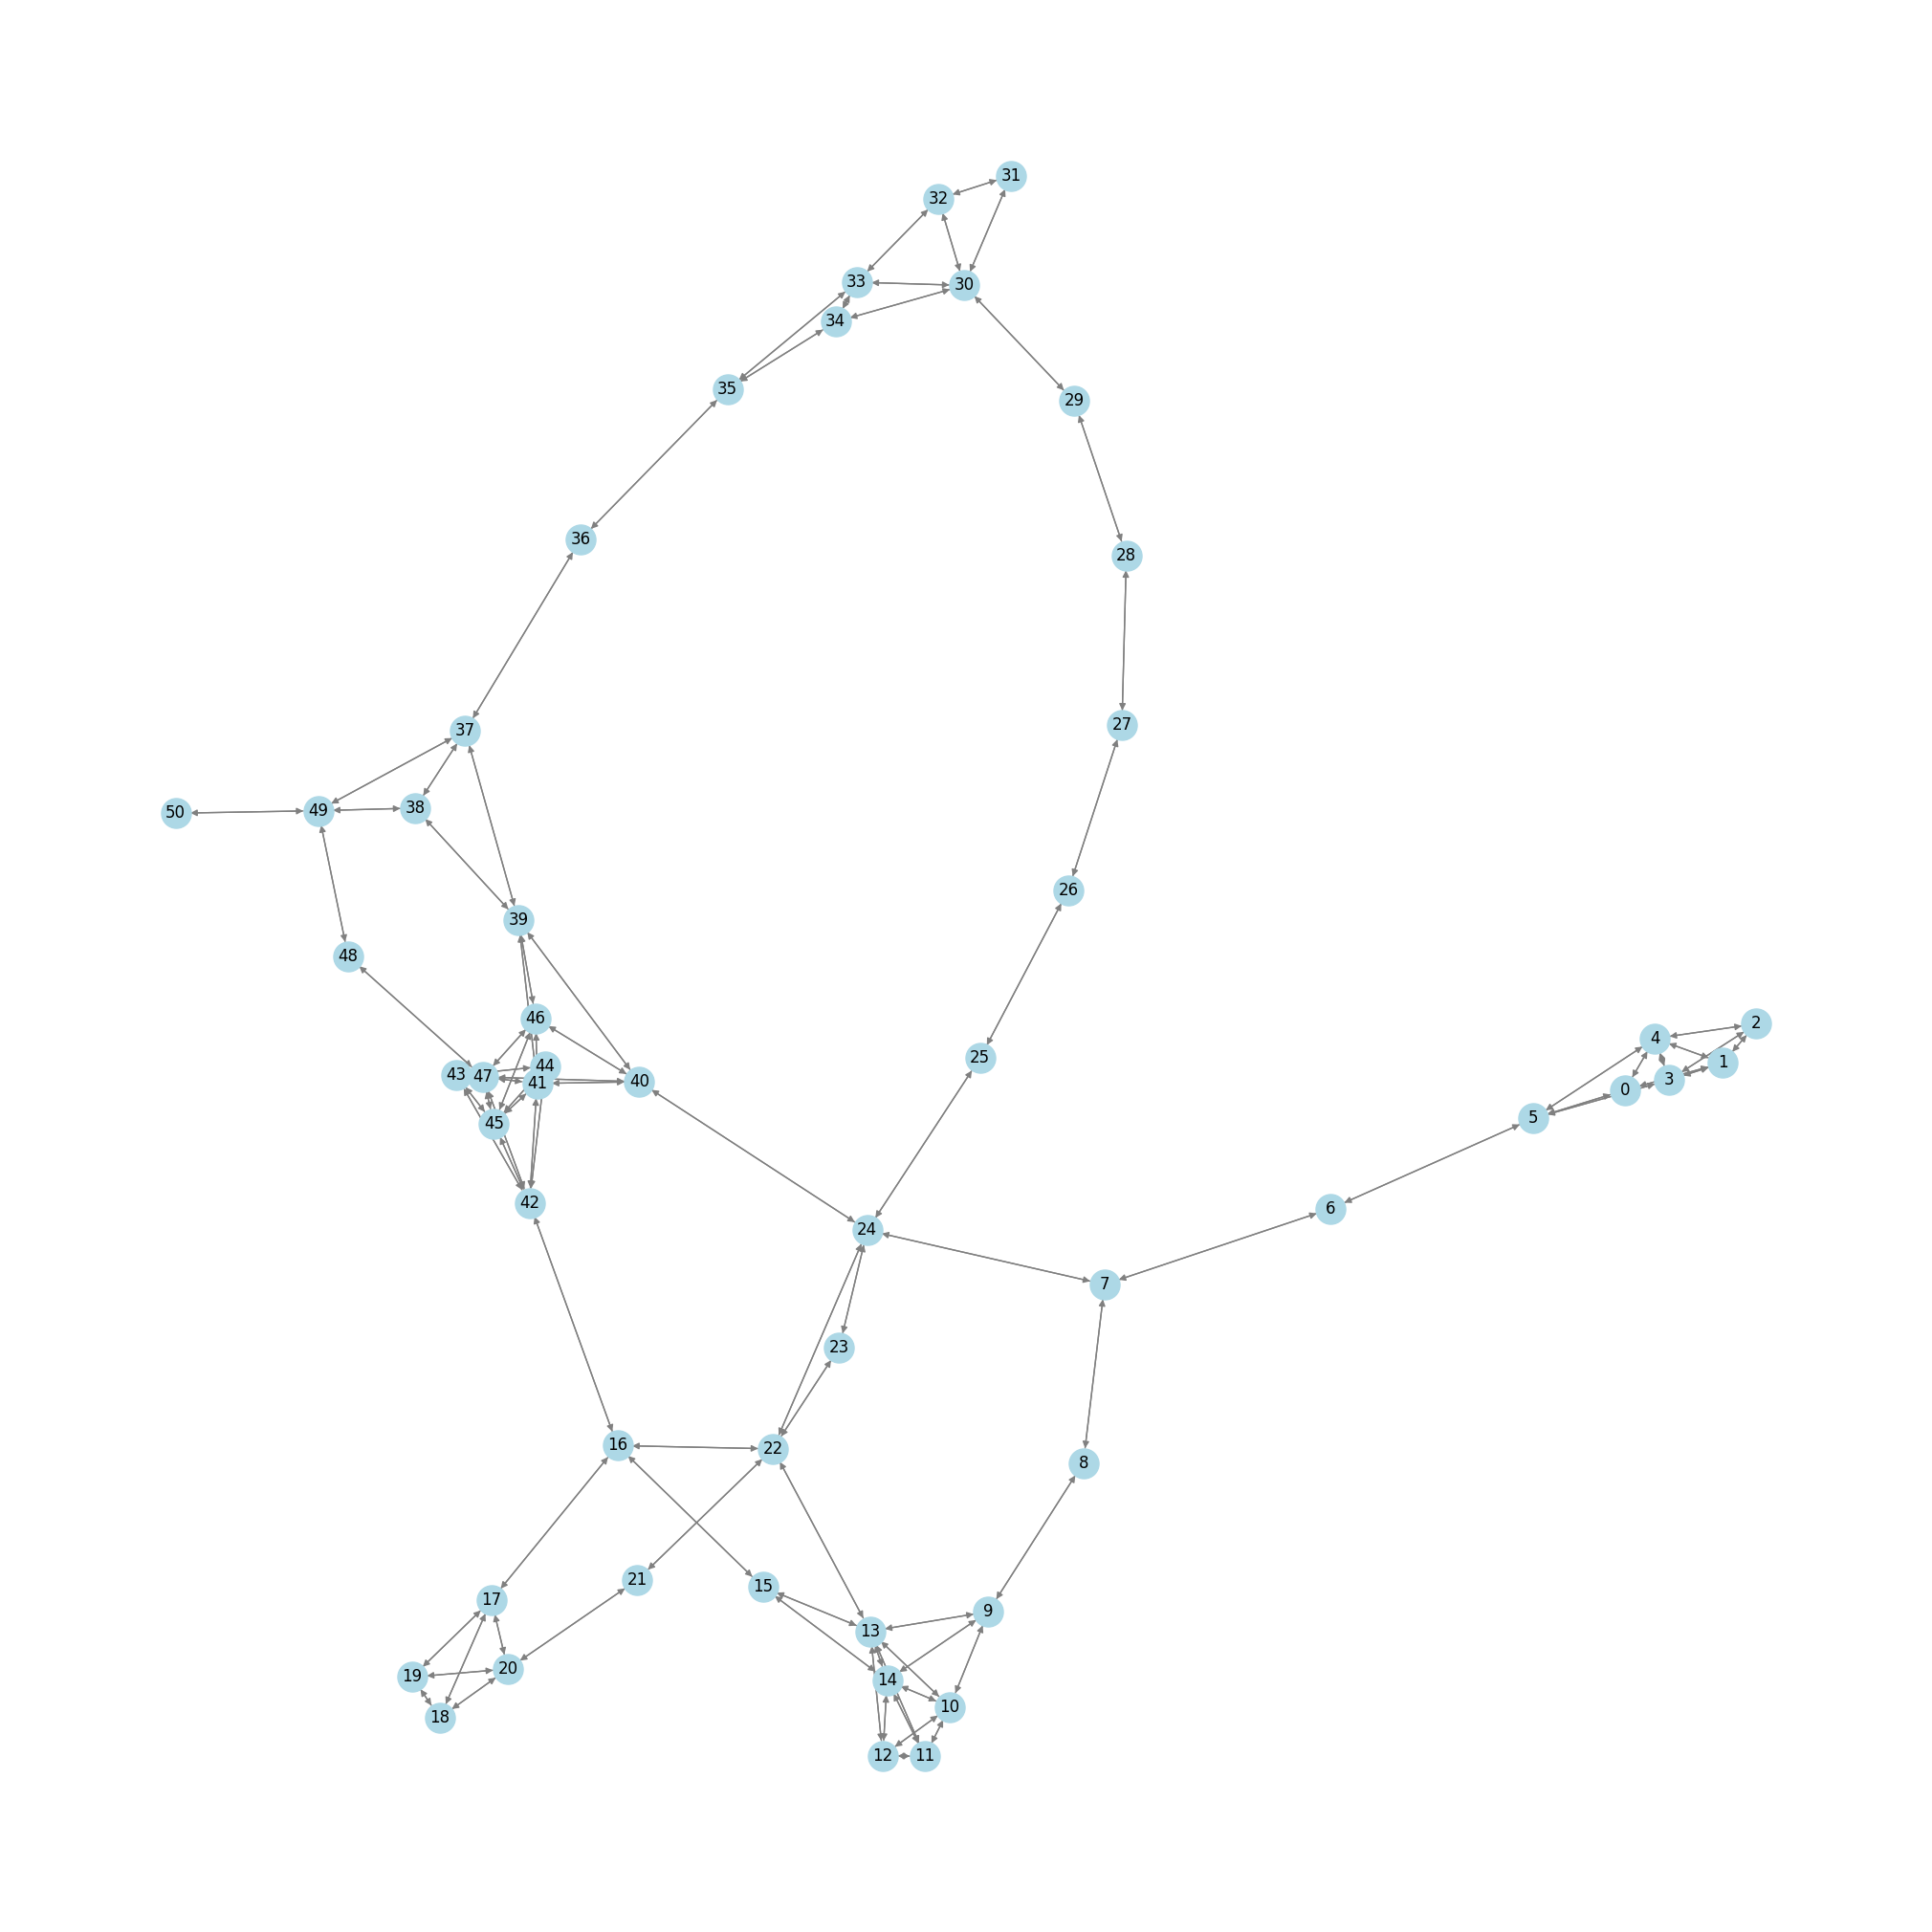

In [4]:
plt.figure(figsize = (20, 20))

nx_graph = graph.to_networkx()

# 为 NetworkX 图设置节点位置
# pos = nx.kamada_kawai_layout(nx_graph)
pos = nx.spring_layout(nx_graph)
# pos = nx.circular_layout(nx_graph)
# pos = nx.shell_layout(nx_graph)
# pos = nx.random_layout(nx_graph)
# pos = nx.spectral_layout(nx_graph)
# pos = nx.planar_layout(nx_graph)

# 绘制图形
nx.draw(nx_graph, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')

# 显示图形
plt.show()